# Dataset Analysis
The *Adult Dataset*, from a 1994 US Census, contains information on a set of citizens, including their age, workclass, final weight, education, marital status, relationship, race, sex, capital gain, capital loss, occupation, work hours per week and native country.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

adult_df = pd.read_csv("data/adult.data", sep=r"\s*,\s*", na_values="?", names=names, engine="python", index_col=False)
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Feature Analysis
This dataset is comprised of both numeric and categorical values. Moreover, the categorical values cannot be easily converted into numerical, which would be the case if the categories were, for example, "True" and "False" or "Low", "Medium" and "High". This being the case, to be able to use a KNN classifier, the categorical features must be dropped.

In [3]:
numeric_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

numeric_adult_df = adult_df[numeric_names]
numeric_adult_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


The second issue that must be dealt with is the range of each numeric feature, as a difference of 20 in age means something different from a difference of 20 in work hours. To normilize the data, all values are changed to fall in the range of 0 to 1.

In [4]:
numeric_adult_df = (numeric_adult_df - numeric_adult_df.min()) / (numeric_adult_df.max() - numeric_adult_df.min())
numeric_adult_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


## Missing Data

To deal with missing data, first we must check the number of missing values per column:

In [24]:
{name: numeric_adult_df[name].isna().sum() for name in numeric_names}

{'age': 0,
 'fnlwgt': 0,
 'education-num': 0,
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 0}

As there is no missing values in the numeric columns, a solution will not be needed for the KNN classfier.

## Test Data

In [6]:
test_df = pd.read_csv("data/adult.test", sep=r"\s*,\s*", na_values="?", names=names, engine="python", index_col=False, skiprows=1)
test_df["class"] = test_df["class"].str.replace(".", "", regex=False)
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
numeric_test_df = test_df[numeric_names]

numeric_test_df = (numeric_test_df - numeric_adult_df.min()) / (numeric_adult_df.max() - numeric_adult_df.min())
numeric_adult_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


# KNN Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [41]:
X = numeric_adult_df
y = adult_df["class"]

test_X = numeric_test_df
test_y = test_df["class"]

The first test was made using the 3 nearest neighbours:

In [18]:
neigh = KNeighborsClassifier(n_neighbors=3)

for k_fold in [3, 5, 10]:
    cross_val_scores = cross_val_score(neigh, X, y, cv=k_fold)
    avg_score = sum(cross_val_scores) / k_fold
    print(f"Avg. accuracy with {k_fold}-fold validation: {avg_score}")

Avg. accuracy with 3-fold validation: 0.7899020136046712
Avg. accuracy with 5-fold validation: 0.7909767310964917
Avg. accuracy with 10-fold validation: 0.7911917744355571


Using the 5 nearest neighbours, the average accuracy goes slightly up:

In [19]:
neigh = KNeighborsClassifier(n_neighbors=5)

for k_fold in [3, 5, 10]:
    cross_val_scores = cross_val_score(neigh, X, y, cv=k_fold)
    avg_score = sum(cross_val_scores) / k_fold
    print(f"Avg. accuracy with {k_fold}-fold validation: {avg_score}")

Avg. accuracy with 3-fold validation: 0.7996069167694227
Avg. accuracy with 5-fold validation: 0.8017567256339712
Avg. accuracy with 10-fold validation: 0.8020945059554208


To estimate the most appropriate value for K (within a specific range), we can compare the accuracy of the model using each K. The range used was 5 to 50 and the accuracy was found using 5-fold cross-validation.

In [10]:
accuracies = []
for k in range(5, 51):
    neigh = KNeighborsClassifier(n_neighbors=k)
    cross_val_scores = cross_val_score(neigh, X, y, cv=5)
    avg_score = sum(cross_val_scores) / 5.0
    accuracies.append(avg_score)

<AxesSubplot:xlabel='k', ylabel='accuracy'>

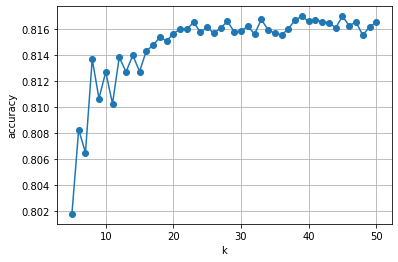

In [11]:
pd.Series(data=accuracies, index=range(5, 51)).plot(xlabel="k", ylabel="accuracy", style="o-", grid=True)

The best accuracy was found with:

In [12]:
k = 39

With that, the test data can be used to validate the model (holdout method): 

In [13]:
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=39)

In [14]:
predicted_y = neigh.predict(test_X)

In [15]:
correct = sum(test_y == predicted_y)
incorrect = sum(test_y != predicted_y)
total = correct + incorrect

pd.DataFrame(index=["Correct", "Incorrect", "Total"], columns=["N", "%"],
             data=[[correct, 100*correct/total], [incorrect, 100*incorrect/total], [total, 100]])

,N,%
Correct,12527,76.942448
Incorrect,3754,23.057552
Total,16281,100.000000


With these results, it is estimated that the accuracy of the model is of 77% (aprox.).

# Classification Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

While classification trees (or decision trees) can use both numeric and categorical values, **scikit-learn**'s algorithm cannot. With that in mind, the same numeric dataset used in the KNN classifier will also be used with this classifier.

In [47]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [48]:
predicted_y = clf.predict(test_X)

In [49]:
correct = sum(test_y == predicted_y)
incorrect = sum(test_y != predicted_y)
total = correct + incorrect

pd.DataFrame(index=["Correct", "Incorrect", "Total"], columns=["N", "%"],
             data=[[correct, 100*correct/total], [incorrect, 100*incorrect/total], [total, 100]])

,N,%
Correct,12719,78.121737
Incorrect,3562,21.878263
Total,16281,100.000000


With these results, it is estimated that the accuracy of the model is of 78% (aprox.), very slightly better than the KNN classifier.

# Accuracy, Precision and Recall